In [8]:
impact.df = read.table("../../../data/all_IMPACT_mutations_180508.txt", sep="\t", stringsAsFactors=F, header=T)
annotation.df <- read.table("../../../data/all_IMPACT_mutations_180508.simple.hg19_multianno.txt", sep="\t", stringsAsFactors=F, header=T)
impact.ann.df <- cbind(impact.df, annotation.df )

In [9]:
table(impact.ann.df$Variant_Type)


   DEL    DNP    INS    SNP    TNP 
 76119   5505  23474 483212    237 

In [10]:
#head(impact.df)
table(impact.df$confidence_class)


  AUTO_OK MANUAL_OK OK_NOT_SO   UNKNOWN  UNLIKELY 
   191228      7113       358    374531     15317 

In [3]:
#colnames(impact.ann.df)

In [11]:
subs.df <- subset(impact.ann.df, Variant_Type=='SNP' & nchar(impact.ann.df$Tumor_Seq_Allele1)==1 &  nchar(impact.ann.df$Tumor_Seq_Allele2)==1 )
subs.df$type <- paste0(subs.df$Tumor_Seq_Allele1, '>', subs.df$Tumor_Seq_Allele2)
nrow(subs.df)
table(subs.df$type)

[1] 483068


   A>C    A>G    A>T    C>A    C>G    C>T    G>A    G>C    G>T    T>A    T>C 
 10885  30060  14281  38145  22618 127066 127218  21235  35682  13635  30180 
   T>G 
 12063 

Select only the variants where it is possible to retrieve the context.

In [37]:
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg19))
sl <- seqlengths(Hsapiens)
subs.df$hasMargin <- subs.df$Start_Position <  sl[paste0('chr',subs.df$Chromosome)]
table( subs.df$hasMargin)
subs.df <- subset(subs.df,hasMargin==TRUE )



  TRUE 
483068 

Extract the tri-nucleotides

In [14]:
subs.df$triplets <- as.character(getSeq(Hsapiens, paste0('chr',subs.df$Chromosome), start=subs.df$Start_Position-1, end=subs.df$Start_Position+1))



In [15]:
nrow(subs.df)

[1] 483068

Load the sequence of mutations for the signature barplot

In [16]:
sh <- read.table('signatures.txt', header=TRUE, sep='\t')
mut.order <- (sh[,'Somatic.Mutation.Type'])

The Kaviar database allows to query the databases of common population variation.

In [17]:
subs.df$Kaviar_AF <- as.numeric(subs.df$Kaviar_AF)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

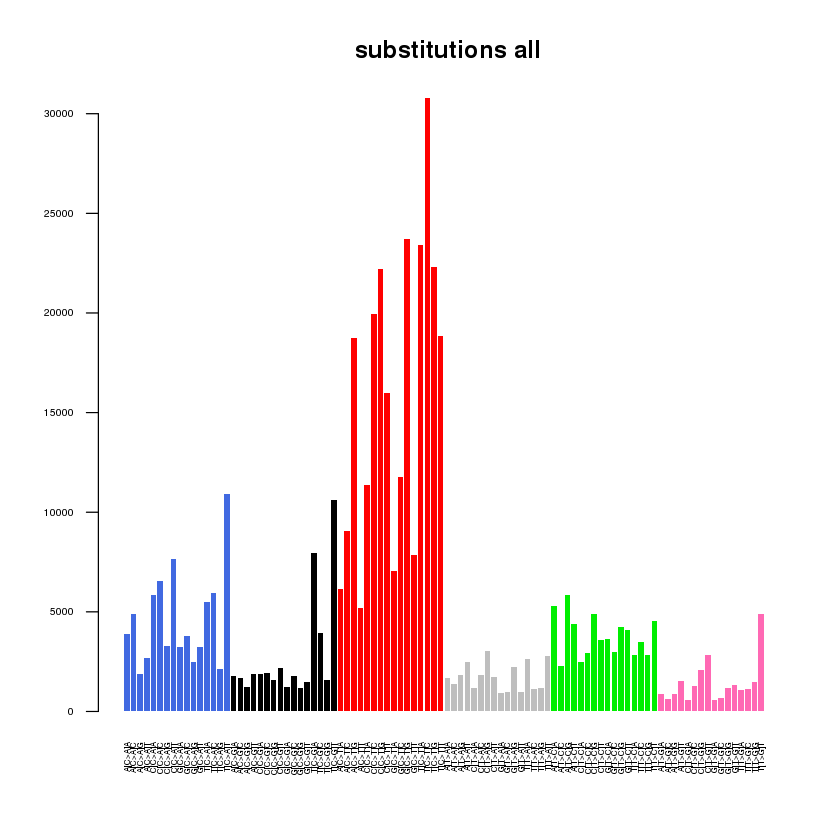

In [18]:
source('plotSignature.R')
subs.ann <- plotSignature(subs.df, mut.order, 'all')

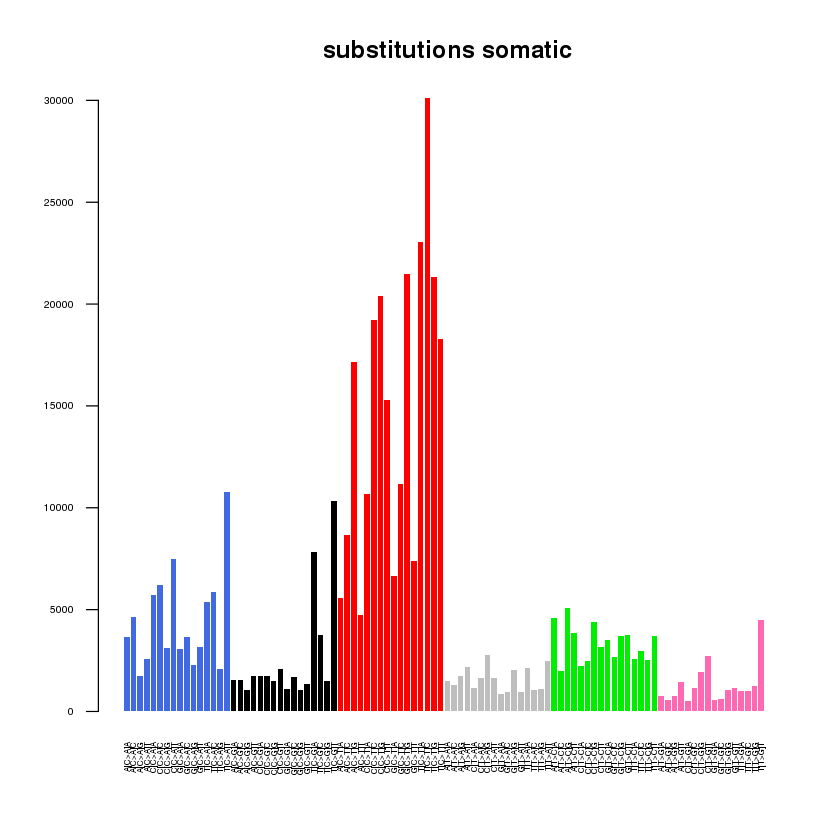

In [19]:
subs.somatic.df <- subset(subs.df, (occurence_in_normals=='0' | occurence_in_normals=='0;0') & (is.na(subs.df$Kaviar_AF) | Kaviar_AF<0.01) )
subs.ann <- plotSignature(subs.somatic.df , mut.order, 'somatic')

[1] 3187

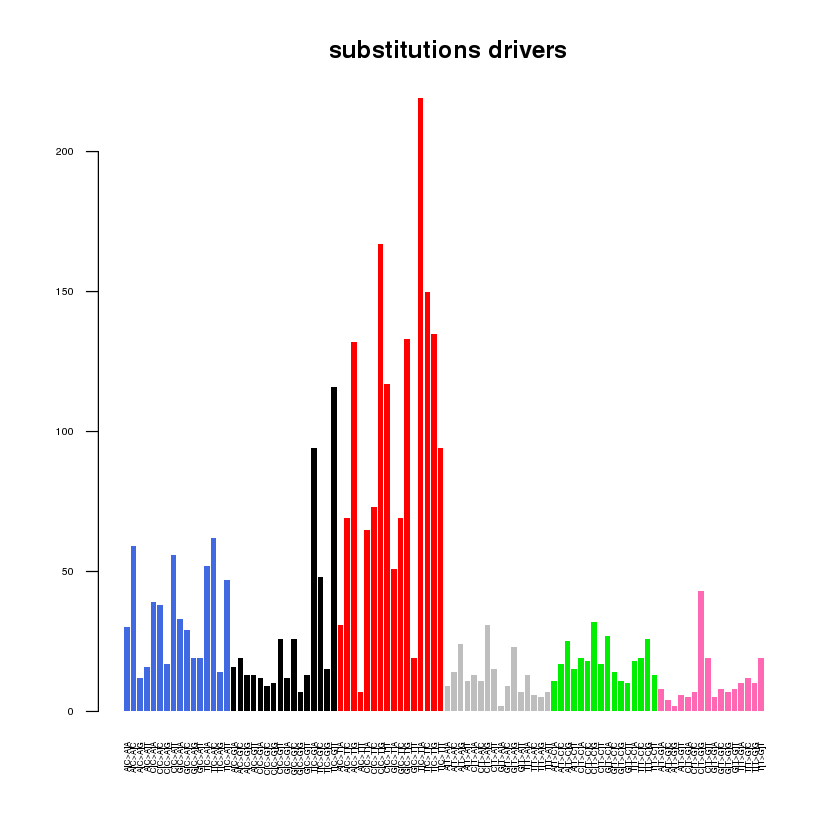

In [20]:
subs.drivers.df <- subset(subs.somatic.df, confidence_class=='MANUAL_OK' )
subs.ann <- plotSignature(subs.drivers.df, mut.order, 'drivers')
nrow(subs.drivers.df )

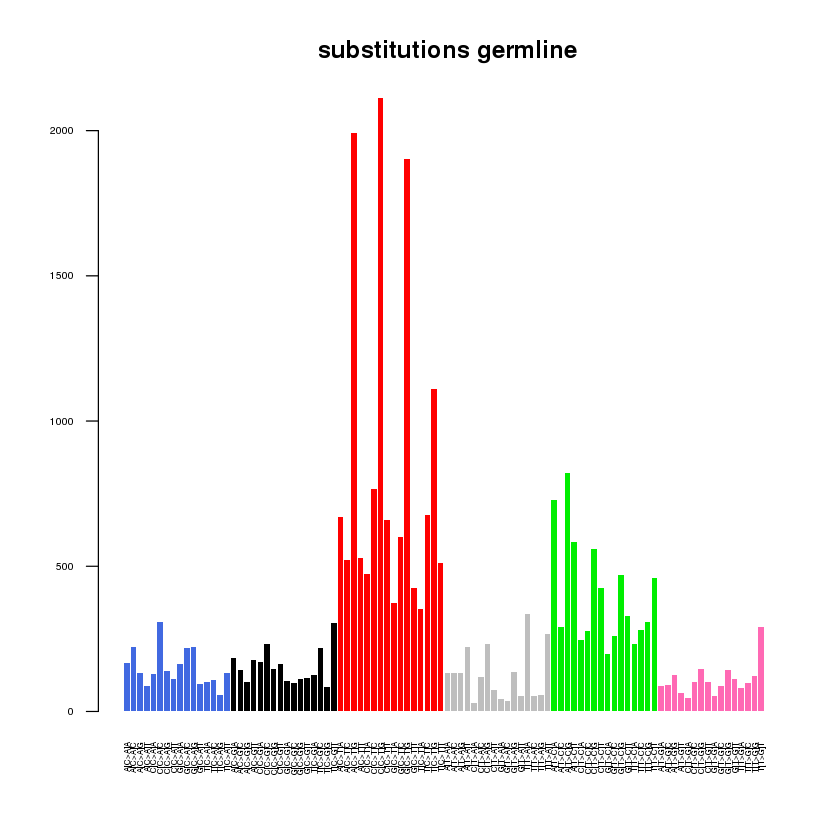

In [21]:
germline.df <- subset(subs.df, !is.na(subs.df$Kaviar_AF) & Kaviar_AF>0.001 )
subs.ann <- plotSignature(germline.df  , mut.order, 'germline')

<img src="https://cancer.sanger.ac.uk/signatures/Signature-1.png" alt="Signature 1">


In [27]:
topSamples <- sort(table(subs.df$ Tumor_Sample_Barcode))
sum(topSamples>50)
round(sum(topSamples>50)/length(topSamples),2)

[1] 1869

[1] 0.08

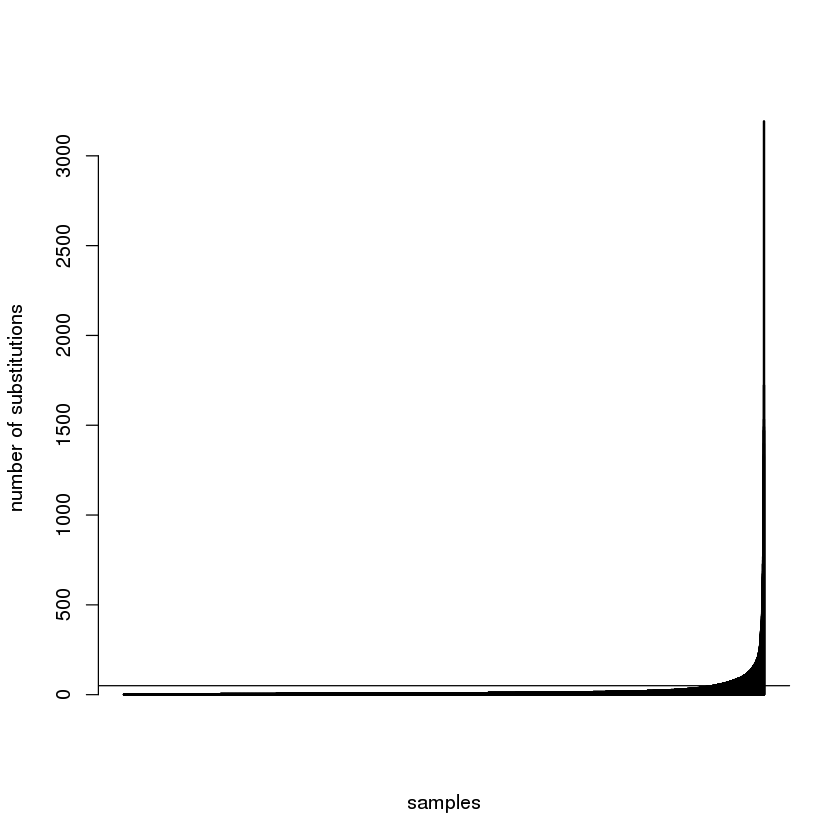

In [31]:
plot(topSamples, xlab='samples', ylab='number of substitutions' , xaxt='n')
abline(h=50)

In [254]:
subs.top <- subset(subs.somatic.df,Tumor_Sample_Barcode=='P-0025368-T01-IM6' )

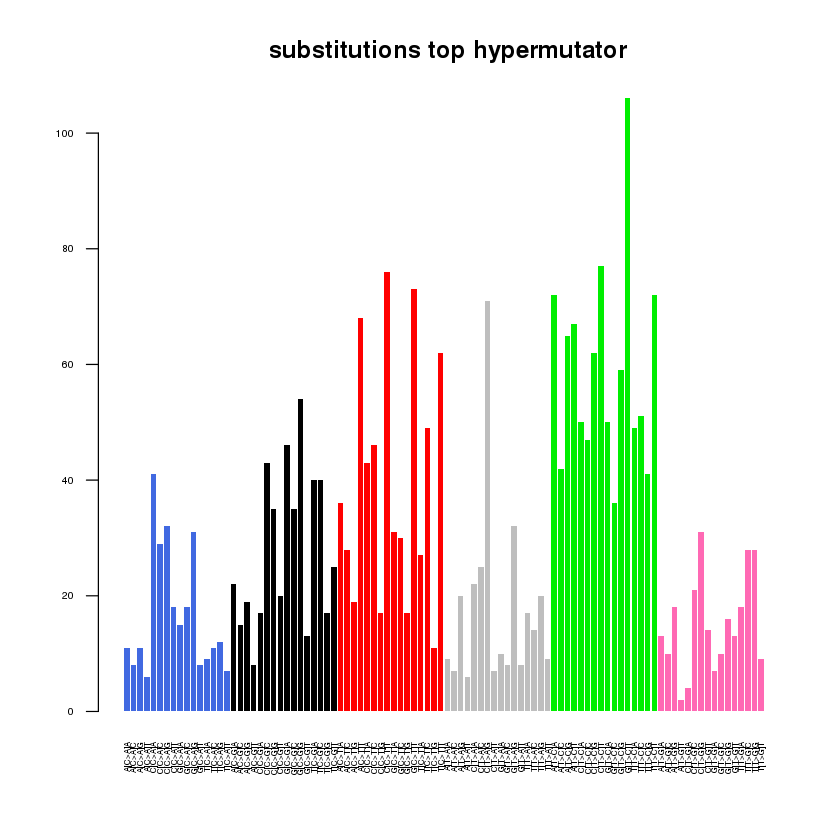

In [255]:
subs.ann <- plotSignature(subs.top  , mut.order, 'top hypermutator')

<img src="https://cancer.sanger.ac.uk/signatures/Signature-26.png" alt="Signature 26">

<img src="https://cancer.sanger.ac.uk/signatures/Signature-6.png" alt="Signature 6">

<img src="https://cancer.sanger.ac.uk/signatures/Signature-20.png" alt="Signature 20">

In [256]:
hypermutators <- topSamples[topSamples>50]
subs.hyper <- subset(subs.somatic.df,Tumor_Sample_Barcode%in% names(hypermutators) )

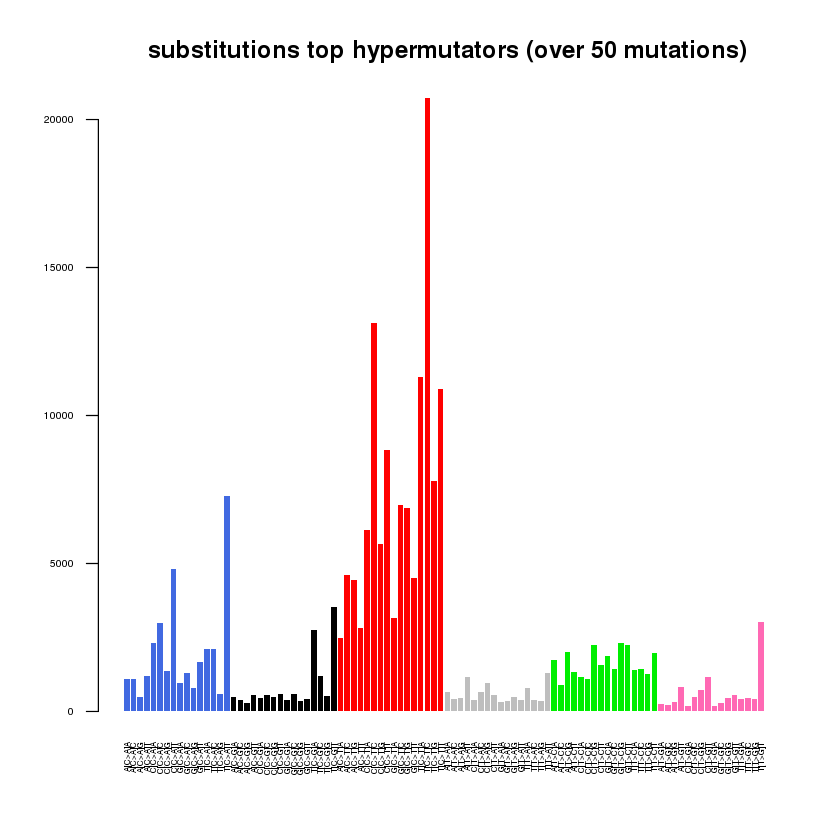

In [257]:
subs.ann <- plotSignature(subs.hyper  , mut.order, 'top hypermutators (over 50 mutations)')

<img src="https://cancer.sanger.ac.uk/signatures/Signature-10.png" alt="Signature 10">